/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


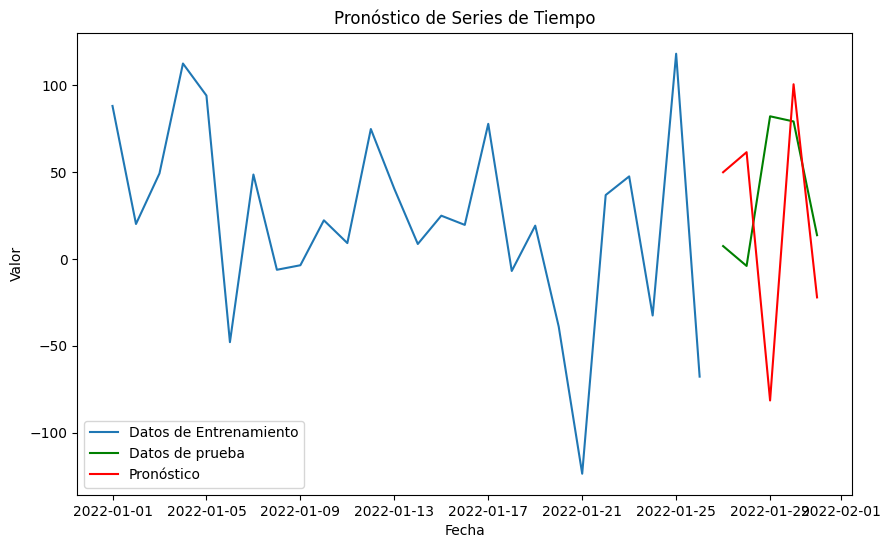

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
np.random.seed(0)
dates= pd.date_range(start='2022-01-01',end='2022-01-31')
values=np.arange(len(dates))*.2 + np.random.randn(len(dates))*50
ts=pd.Series(values,index=dates)

#Entrenar
train_data = ts[:'2022-01-26']
test_data = ts['2022-01-27':]

#ajustar el modelo
modell = ARIMA(train_data, order=(10, 1, 6))
model_fit = modell.fit()
#Pronostico

if len(test_data) > 0:
    forecast = model_fit.forecast(steps=len(test_data))
    # Continue with your forecasting logic here
    #Grafica
    plt.figure(figsize=(10, 6))
    plt.plot(train_data, label='Datos de Entrenamiento')
    plt.plot(test_data, label='Datos de prueba', color='green')
    plt.plot(test_data.index, forecast, label='Pronóstico', color='red')
    plt.xlabel('Fecha')
    plt.ylabel('Valor')
    plt.title('Pronóstico de Series de Tiempo')
    plt.legend()
    plt.show()


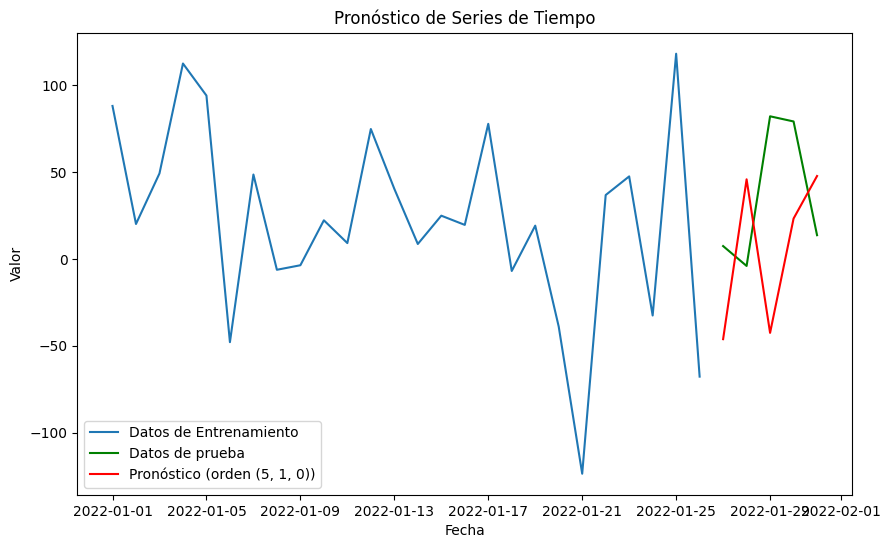

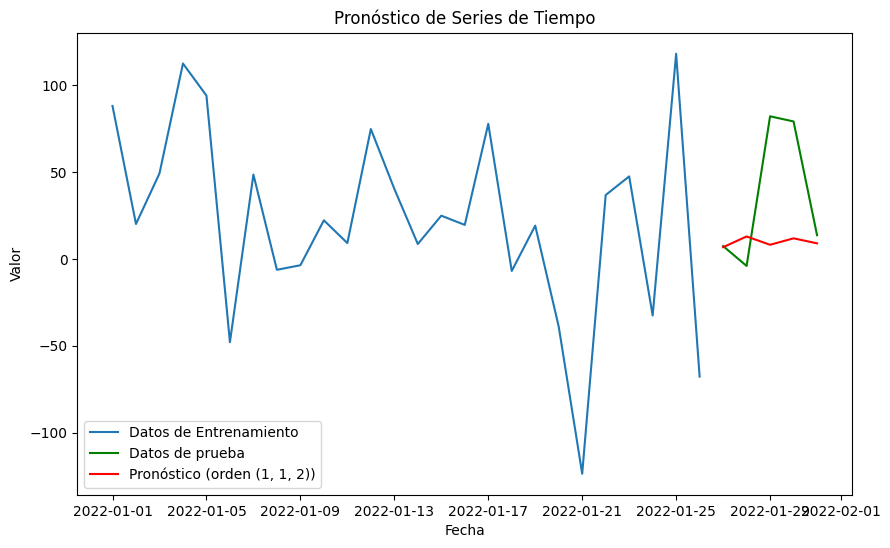

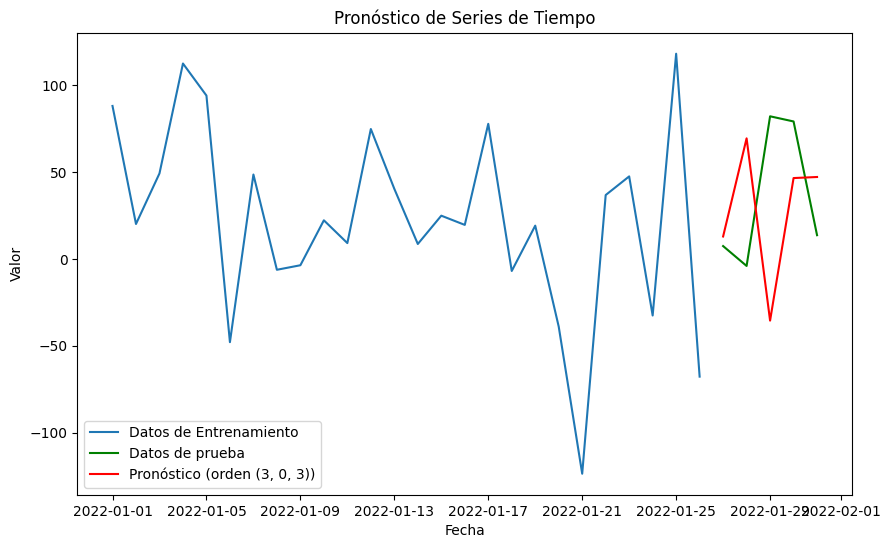

In [ ]:

# Probar diferentes órdenes
orders = [(5, 1, 0), (1, 1, 2), (3, 0, 3)]  # Ejemplo de órdenes

for order in orders:
    # Ajustar el modelo
    model = ARIMA(train_data, order=order)
    model_fit = model.fit()

    # Pronóstico
    if len(test_data) > 0:
        forecast = model_fit.forecast(steps=len(test_data))

        # Gráfica
        plt.figure(figsize=(10, 6))
        plt.plot(train_data, label='Datos de Entrenamiento')
        plt.plot(test_data, label='Datos de prueba', color='green')
        plt.plot(test_data.index, forecast, label='Pronóstico (orden {})'.format(order), color='red')
        plt.xlabel('Fecha')
        plt.ylabel('Valor')
        plt.title('Pronóstico de Series de Tiempo')
        plt.legend()
        plt.show()
